Kiersten Wener and Eli Chesnut

We will be using the F1-Score. It is the best choice for our dog-vs-cat classification task because it balances precision and recall, making it ideal for scenarios where the dataset might be slightly imbalanced or when both types of errors—falsely classifying a cat as a dog or a dog as a cat—are equally important. While accuracy gives a broad sense of performance, it can be misleading in cases of imbalance. The F1-Score ensures that our model performs well not only in predicting the dominant class but also in identifying the minority class correctly, leading to a more reliable assessment of its real-world performance.

We want to minimize mis-identification, we want to get it right purposefully. This also will help in real world application when there might be an imbalance of testing data.

We will be using sh

In [115]:
import pandas as pd
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

print(pd.__version__)
print(np.__version__)




2.2.3
2.0.2


In [116]:
#path_to_images = '/Users/elichesnut/Documents/GitHub/MLLab6/images'
path_to_images = '/Users/kierstenwener/Downloads/images 2'

images = []
labels = []
dog_breeds = ['american','wheaten','staffordshire','shiba','scottish','samoyed','saint','pug','pomeranian','newfoundland','miniature','leonberger','keeshond','japanese','havanese','great','german','english','chihuahua','boxer','beagle','basset']

for filename in os.listdir(path_to_images):
    if filename.endswith('.jpg'):
        img_path = os.path.join(path_to_images, filename)
        #resize the images
        img = Image.open(img_path).convert('RGB')
        img = img.resize((64, 64))
        images.append(np.array(img))#adds the individual image to the array of images 
        label = filename.split('_')[0] #this gets the breed name 
        #int encode target integer, 0 is dog 1 is cat
        if label in dog_breeds:
            label = 0
        else:
            label = 1
        labels.append(label) #appends the picture label to the label vector 

# combined = list(zip(images, labels))
combined = list(zip(images, labels))
np.random.shuffle(combined)
images, labels = zip(*combined)
subset_images = images[:1000]
subset_labels = labels[:1000]



X_train, X_test, y_train, y_test = train_test_split(subset_images, subset_labels, test_size=0.2)




We can add a normalization layer to the sequential =

one hot encode and turn to numpy

In [ ]:
from tensorflow.keras.utils import to_categorical

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

import numpy as np

# Convert image data lists to NumPy arrays

# X_test = np.array(X_test).astype('float32') / 255.0 
# X_train = np.array(X_train).astype('float32') / 255.0 


In [137]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    horizontal_flip=True,
    rotation_range=20,
    zoom_range=0.2,
    brightness_range=[0.8, 1.2]
)


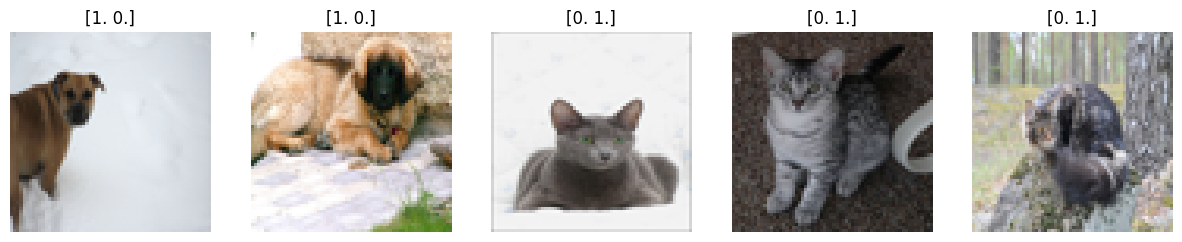

(64, 64, 3)


In [118]:
plt.figure(figsize=(15, 10))

for i in range(5):
    plt.subplot(1, 5, i + 1)  
    plt.title(y_train[i])
    plt.imshow(X_train[i]) 
    plt.axis('off')  

plt.show()  # 
print(subset_images[0].shape)

In [119]:
from sklearn import metrics as mt
from matplotlib import pyplot as plt
from skimage.io import imshow
import seaborn as sns
%matplotlib inline
labels = ['Dog', 'Cat']
def summarize_net(net, X_test, y_test, title_text=''):
    plt.figure(figsize=(15,5))
    yhat = np.argmax(net.predict(X_test), axis=1)
    y_test_single = np.argmax(y_test, axis=1)


    acc = mt.accuracy_score(y_test_single,yhat)
    cm = mt.confusion_matrix(y_test_single,yhat)
    cm = cm/np.sum(cm,axis=1)[:,np.newaxis]
    sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=labels,yticklabels=labels)
    plt.title(title_text+'{:.4f}'.format(acc))

In [173]:

import setuptools.dist
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten 
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import RandomFlip, RandomRotation
from tensorflow.keras.layers import SeparableConv2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Add, Input
from tensorflow.keras.layers import average, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomTranslation
from tensorflow.keras.layers import RandomContrast, RandomBrightness
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2 
from tensorflow.keras.metrics import Precision, Recall
#start with alexnet convolutional phase
# cnn = Sequential(name='3x3_kernel')
# cnn.add( Conv2D(filters=16, kernel_size= (3,3), padding='same', input_shape=(32,32,3)))

import setuptools.dist
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten 
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import RandomFlip, RandomRotation
from tensorflow.keras.layers import SeparableConv2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Add, Input
from tensorflow.keras.layers import average, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomTranslation
from tensorflow.keras.layers import RandomContrast, RandomBrightness
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2 
from tensorflow.keras.metrics import Precision, Recall
#start with alexnet convolutional phase
# cnn = Sequential(name='3x3_kernel')
# cnn.add( Conv2D(filters=16, kernel_size= (3,3), padding='same', input_shape=(32,32,3)))
cnn = Sequential() 
cnn.add( Conv2D(filters=16, kernel_size= (4, 4), padding='same', 
                input_shape=(64,64,3),
               ) )

cnn.add( MaxPooling2D(pool_size=(2, 2)) )
cnn.add( Activation('relu') )
# add one layer on flattened output
cnn.add( Flatten() )
cnn.add( Dense(2) )
cnn.add( Activation('softmax') )

cnn.compile(loss='mean_squared_error',
              optimizer='rmsprop',
              metrics=['accuracy'])

print(cnn.summary())

plot_model(
    cnn, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='LR', expand_nested=False, dpi=96
)


/Users/kierstenwener/Desktop/MLLab6/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_85 (Conv2D)              │ (None, 64, 64, 16)     │           784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_42 (MaxPooling2D) │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_37 (Flatten)            │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_71 (Dense)                │ (None, 2)              │        32,770 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_12 (Activation)      │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,554 (131.07 KB)

 Trainable params: 33,554 (131.07 KB)

 Non-trainable params: 0 (0.00 B)

None
You must install pydot (`pip install pydot`) for `plot_model` to work.


In [174]:


history = cnn.fit(X_train, y_train, 
        batch_size=32, epochs=150, 
        shuffle=True, validation_data=(X_test, y_test),verbose=0)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


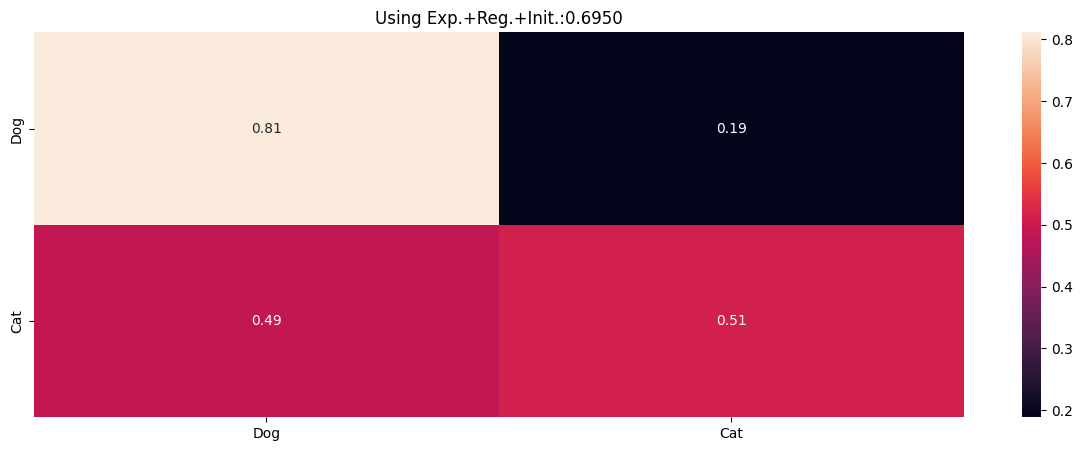

In [175]:
summarize_net(cnn, X_test, y_test, title_text='Using Exp.+Reg.+Init.:')

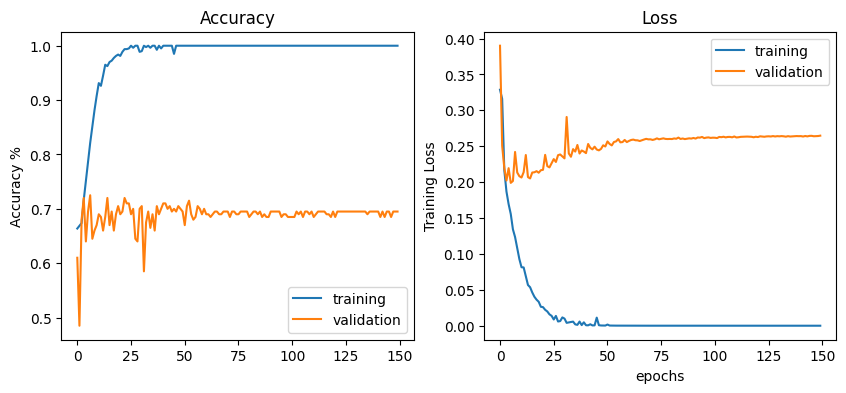

In [176]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='training')

plt.ylabel('Accuracy %')
plt.title('Training')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='training')
plt.ylabel('Training Loss')
plt.xlabel('epochs')

plt.plot(history.history['val_loss'], label='validation')
plt.xlabel('epochs')
plt.title('Loss')
plt.legend()
plt.show()

In [197]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

cnn1 = Sequential()

# Add convolutional layers with input shape
cnn1.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 3)))
cnn1.add(MaxPooling2D(pool_size=(2, 2)))

cnn1.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
cnn1.add(MaxPooling2D(pool_size=(2, 2)))

cnn1.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
cnn1.add(MaxPooling2D(pool_size=(2, 2)))

cnn1.add(Flatten())
cnn1.add(Dense(128, activation='relu'))
cnn1.add(Dropout(0.5))
cnn1.add(Dense(2, activation='softmax'))  # Binary classification

cnn1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

cnn1.summary()  # This will now show the correct model summary with parameters

# Train the model (use your own X_train and y_train)
history2 = cnn1.fit(X_train, y_train, batch_size=32, epochs=15, shuffle=True, validation_data=(X_test, y_test))


Model: "sequential_52"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_120 (Conv2D)             │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_77 (MaxPooling2D) │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_121 (Conv2D)             │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_78 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_122 (Conv2D)             │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_79 (MaxPooling2D) │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_52 (Flatten)            │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_107 (Dense)               │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_72 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_108 (Dense)               │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,142,210 (4.36 MB)

 Trainable params: 1,142,210 (4.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.5860 - loss: 0.7297 - val_accuracy: 0.6100 - val_loss: 0.6696
Epoch 2/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.6673 - loss: 0.6359 - val_accuracy: 0.6100 - val_loss: 0.7200
Epoch 3/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.6577 - loss: 0.6438 - val_accuracy: 0.6100 - val_loss: 0.6482
Epoch 4/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.6744 - loss: 0.5985 - val_accuracy: 0.6200 - val_loss: 0.6028
Epoch 5/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.6783 - loss: 0.5710 - val_accuracy: 0.6300 - val_loss: 0.5757
Epoch 6/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.7148 - loss: 0.5338 - val_accuracy: 0.6400 - val_loss: 0.5901
Epoch 7/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.7180 - loss: 0.5163 - val_accuracy: 0.7250 - val_loss: 0.5922
Epoch 8/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.7323 - loss: 0.4993 - val_accuracy: 0.6950 - v

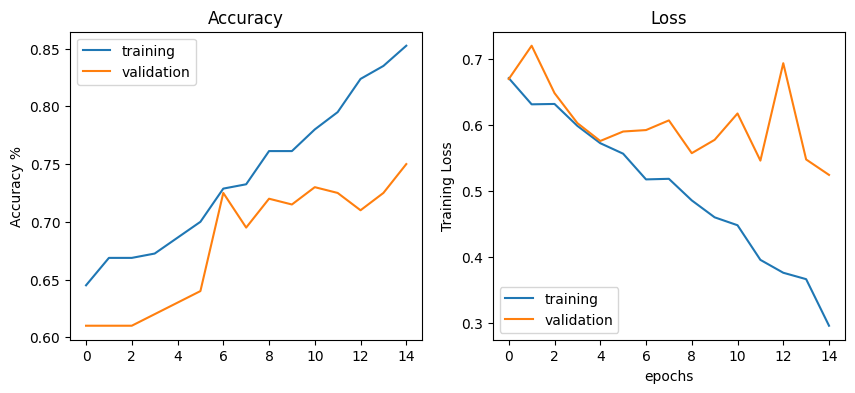

In [198]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history2.history['accuracy'], label='training')

plt.ylabel('Accuracy %')
plt.title('Training')
plt.plot(history2.history['val_accuracy'], label='validation')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history2.history['loss'], label='training')
plt.ylabel('Training Loss')
plt.xlabel('epochs')

plt.plot(history2.history['val_loss'], label='validation')
plt.xlabel('epochs')
plt.title('Loss')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,         # Randomly rotate images by up to 20 degrees
    width_shift_range=0.2,     # Randomly translate images horizontally
    height_shift_range=0.2,    # Randomly translate images vertically
    shear_range=0.15,          # Shear transformations
    zoom_range=0.15,           # Zoom in or out on images
    horizontal_flip=True,      # Flip images horizontally
    fill_mode='nearest',       # Fill in missing pixels after transformations
    rescale=1./255             # Normalize pixel values to [0, 1]
)